In [1]:
pip install pandas numpy seaborn matplotlib scikit-learn prophet gradio plotly

Defaulting to user installation because normal site-packages is not writeable
  Using cached prophet-1.1.5-py3-none-win_amd64.whl.metadata (3.6 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cmdstanpy-1.2.3-py3-none-any.whl.metadata (4.1 kB)
  Using cached holidays-0.50-py3-none-any.whl.metadata (23 kB)
  Using cached importlib_resources-6.4.0-py3-none-any.whl.metadata (3.9 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/50.9 kB ? eta -:--:--
     ---------------------------------------- 50.9/50.9 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 0.0/109.0 kB ? eta -:--:--
     -------------------------------------- 109.0/109.0 kB 3.2 MB/s eta 0:00:00
  Using cached urllib3-2.2.1-py3-none-any.whl.metadata (6.4 kB)
  Using cached stanio-0.5.0-py3-none-any.whl.metadata (1.3 kB)
Using cached prophet-1.1.5-py3-none-win_amd64.whl 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.9.0 requires urllib3[socks]~=1.26, but you have urllib3 2.2.1 which is incompatible.

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\pip\_internal\cli\req_command.py", line 245, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\pip\_internal\commands\install.py", line 324, in run
    session = self.get_default_session(options)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\pip\_internal\cli\req_command.py", line 95, in get_default_session
    self._session = self.enter_context(self._build_session(options))
                                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\pi

In [5]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\pip\_internal\cli\req_command.py", line 245, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\pip\_internal\commands\install.py", line 324, in run
    session = self.get_default_session(options)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\pip\_internal\cli\req_command.py", line 95, in get_default_session
    self._session = self.enter_context(self._build_session(options))
                                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\pi

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from math import sqrt
from prophet import Prophet
import gradio as gr



In [72]:
df= pd.read_csv('long_data_.csv')

<Axes: xlabel='States'>

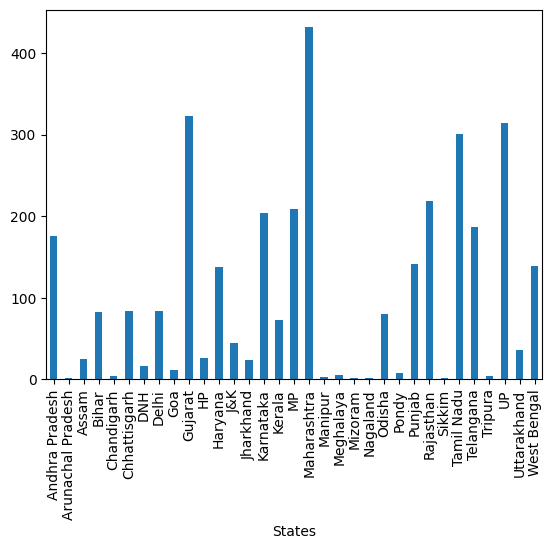

In [73]:
# @title Usage Distribution by State


df.groupby('States')['Usage'].mean().plot(kind='bar')

In [74]:
df.dropna(subset=['Dates'], inplace=True)


In [75]:
from dateutil import parser

def parse_date(date_str):
    formats = ["%d/%m/%Y %H:%M:%S", "%d-%m-%Y %H:%M"]
    for fmt in formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    # Fallback to dateutil parser for unhandled formats
    return parser.parse(date_str, dayfirst=True)  # Adjust `dayfirst` as needed

df['Dates'] = df['Dates'].apply(parse_date)



In [76]:
df['Dates'] = pd.to_datetime(df['Dates'], errors='coerce')


In [77]:
# Feature extraction
df['year'] = df['Dates'].dt.year
df['month'] = df['Dates'].dt.month
df['day'] = df['Dates'].dt.day
df['weekday'] = df['Dates'].dt.weekday
df['weekday_name'] = df['Dates'].dt.strftime('%A')
df['month_name'] = df['Dates'].dt.strftime('%B')

In [78]:


# Prepare data for Prophet
def prepare_data_for_prophet(state):
    state_df = df[df['States'] == state]
    df_prophet = state_df[['Dates', 'Usage']].rename(columns={'Dates': 'ds', 'Usage': 'y'})
    return df_prophet

state_models = {}

In [79]:
for state in df['States'].unique():
    df_prophet = prepare_data_for_prophet(state)
    if not df_prophet.empty:
        train_size = int(len(df_prophet) * 0.8)
        train_df = df_prophet.iloc[:train_size]
        print(train_df)
        model = Prophet()
        model.fit(train_df)
        state_models[state] = model

              ds      y
0     2019-01-02  119.9
33    2019-01-03  121.9
66    2019-01-04  118.8
99    2019-01-05  121.0
132   2019-01-06  121.4
...          ...    ...
13101 2020-02-22  107.4
13134 2020-02-23  150.1
13167 2020-02-24  156.9
13200 2020-02-25  169.9
13233 2020-02-26  168.9

[402 rows x 2 columns]


13:03:24 - cmdstanpy - INFO - Chain [1] start processing
13:03:24 - cmdstanpy - INFO - Chain [1] done processing
13:03:24 - cmdstanpy - INFO - Chain [1] start processing


              ds      y
1     2019-01-02  130.3
34    2019-01-03  133.5
67    2019-01-04  128.2
100   2019-01-05  127.5
133   2019-01-06  132.6
...          ...    ...
13102 2020-02-22  116.6
13135 2020-02-23  156.6
13168 2020-02-24  165.3
13201 2020-02-25  169.2
13234 2020-02-26  170.7

[402 rows x 2 columns]


13:03:24 - cmdstanpy - INFO - Chain [1] done processing
13:03:24 - cmdstanpy - INFO - Chain [1] start processing


              ds      y
2     2019-01-02  234.1
35    2019-01-03  240.2
68    2019-01-04  239.8
101   2019-01-05  239.1
134   2019-01-06  240.4
...          ...    ...
13103 2020-02-22  233.9
13136 2020-02-23  223.1
13169 2020-02-24  230.6
13202 2020-02-25  239.3
13235 2020-02-26  242.0

[402 rows x 2 columns]


13:03:25 - cmdstanpy - INFO - Chain [1] done processing
13:03:25 - cmdstanpy - INFO - Chain [1] start processing


              ds      y
3     2019-01-02   85.8
36    2019-01-03   85.5
69    2019-01-04   83.5
102   2019-01-05   79.2
135   2019-01-06   76.6
...          ...    ...
13104 2020-02-22   65.4
13137 2020-02-23  106.7
13170 2020-02-24  110.7
13203 2020-02-25  114.5
13236 2020-02-26  117.1

[402 rows x 2 columns]


13:03:25 - cmdstanpy - INFO - Chain [1] done processing


              ds      y
4     2019-01-02  313.9
37    2019-01-03  311.8
70    2019-01-04  320.7
103   2019-01-05  299.0
136   2019-01-06  286.8
...          ...    ...
13105 2020-02-22  285.5
13138 2020-02-23  380.9
13171 2020-02-24  395.5
13204 2020-02-25  408.6
13237 2020-02-26  419.6

[402 rows x 2 columns]


13:03:25 - cmdstanpy - INFO - Chain [1] start processing
13:03:25 - cmdstanpy - INFO - Chain [1] done processing
13:03:25 - cmdstanpy - INFO - Chain [1] start processing


              ds     y
5     2019-01-02  40.7
38    2019-01-03  39.3
71    2019-01-04  38.1
104   2019-01-05  39.2
137   2019-01-06  39.2
...          ...   ...
13106 2020-02-22  35.6
13139 2020-02-23  48.5
13172 2020-02-24  43.0
13205 2020-02-25  43.6
13238 2020-02-26  43.8

[402 rows x 2 columns]


13:03:25 - cmdstanpy - INFO - Chain [1] done processing


              ds     y
6     2019-01-02  30.0
39    2019-01-03  30.1
72    2019-01-04  30.1
105   2019-01-05  30.2
138   2019-01-06  31.0
...          ...   ...
13107 2020-02-22  27.3
13140 2020-02-23  26.7
13173 2020-02-24  27.4
13206 2020-02-25  28.4
13239 2020-02-26  28.0

[402 rows x 2 columns]


13:03:26 - cmdstanpy - INFO - Chain [1] start processing
13:03:26 - cmdstanpy - INFO - Chain [1] done processing
13:03:26 - cmdstanpy - INFO - Chain [1] start processing


              ds     y
7     2019-01-02  52.5
40    2019-01-03  54.1
73    2019-01-04  53.2
106   2019-01-05  51.5
139   2019-01-06  53.2
...          ...   ...
13108 2020-02-22  54.2
13141 2020-02-23  46.4
13174 2020-02-24  45.0
13207 2020-02-25  45.8
13240 2020-02-26  47.2

[402 rows x 2 columns]


13:03:26 - cmdstanpy - INFO - Chain [1] done processing
13:03:26 - cmdstanpy - INFO - Chain [1] start processing


              ds    y
8     2019-01-02  5.0
41    2019-01-03  4.9
74    2019-01-04  4.8
107   2019-01-05  4.3
140   2019-01-06  4.3
...          ...  ...
13109 2020-02-22  3.2
13142 2020-02-23  4.9
13175 2020-02-24  4.9
13208 2020-02-25  5.1
13241 2020-02-26  5.4

[402 rows x 2 columns]


13:03:26 - cmdstanpy - INFO - Chain [1] done processing
13:03:26 - cmdstanpy - INFO - Chain [1] start processing


              ds     y
9     2019-01-02  78.7
42    2019-01-03  78.8
75    2019-01-04  74.8
108   2019-01-05  69.0
141   2019-01-06  68.1
...          ...   ...
13110 2020-02-22  81.8
13143 2020-02-23  96.3
13176 2020-02-24  95.4
13209 2020-02-25  95.2
13242 2020-02-26  97.0

[402 rows x 2 columns]


13:03:26 - cmdstanpy - INFO - Chain [1] done processing
13:03:27 - cmdstanpy - INFO - Chain [1] start processing


              ds      y
10    2019-01-02  319.5
43    2019-01-03  316.7
76    2019-01-04  301.9
109   2019-01-05  313.2
142   2019-01-06  320.7
...          ...    ...
13111 2020-02-22  315.6
13144 2020-02-23  373.2
13177 2020-02-24  379.4
13210 2020-02-25  373.5
13243 2020-02-26  376.2

[402 rows x 2 columns]


13:03:27 - cmdstanpy - INFO - Chain [1] done processing


              ds      y
11    2019-01-02  253.0
44    2019-01-03  253.6
77    2019-01-04  239.3
110   2019-01-05  228.2
143   2019-01-06  227.4
...          ...    ...
13112 2020-02-22  253.7
13145 2020-02-23  208.7
13178 2020-02-24  209.7
13211 2020-02-25  210.6
13244 2020-02-26  213.5

[402 rows x 2 columns]


13:03:27 - cmdstanpy - INFO - Chain [1] start processing
13:03:27 - cmdstanpy - INFO - Chain [1] done processing


              ds      y
12    2019-01-02  428.6
45    2019-01-03  419.6
78    2019-01-04  395.8
111   2019-01-05  411.1
144   2019-01-06  408.6
...          ...    ...
13113 2020-02-22  401.3
13146 2020-02-23  497.2
13179 2020-02-24  504.1
13212 2020-02-25  501.8
13245 2020-02-26  496.2

[402 rows x 2 columns]


13:03:27 - cmdstanpy - INFO - Chain [1] start processing
13:03:27 - cmdstanpy - INFO - Chain [1] done processing


              ds     y
13    2019-01-02  12.8
46    2019-01-03  13.7
79    2019-01-04  12.6
112   2019-01-05  13.0
145   2019-01-06  12.9
...          ...   ...
13114 2020-02-22   9.5
13147 2020-02-23  10.7
13180 2020-02-24  10.7
13213 2020-02-25  10.7
13246 2020-02-26  10.7

[402 rows x 2 columns]


13:03:27 - cmdstanpy - INFO - Chain [1] start processing
13:03:28 - cmdstanpy - INFO - Chain [1] done processing


              ds     y
14    2019-01-02  18.6
47    2019-01-03  18.2
80    2019-01-04  16.7
113   2019-01-05  17.6
146   2019-01-06  18.6
...          ...   ...
13115 2020-02-22  17.3
13148 2020-02-23  18.4
13181 2020-02-24  18.5
13214 2020-02-25  18.5
13247 2020-02-26  18.3

[402 rows x 2 columns]


13:03:28 - cmdstanpy - INFO - Chain [1] start processing
13:03:28 - cmdstanpy - INFO - Chain [1] done processing
13:03:28 - cmdstanpy - INFO - Chain [1] start processing


              ds      y
15    2019-01-02  164.6
48    2019-01-03  170.1
81    2019-01-04  165.2
114   2019-01-05  167.4
147   2019-01-06  171.2
...          ...    ...
13116 2020-02-22  161.7
13149 2020-02-23  196.6
13182 2020-02-24  196.5
13215 2020-02-25  195.6
13248 2020-02-26  201.7

[402 rows x 2 columns]


13:03:28 - cmdstanpy - INFO - Chain [1] done processing


              ds      y
16    2019-01-02  204.2
49    2019-01-03  204.5
82    2019-01-04  201.2
115   2019-01-05  201.7
148   2019-01-06  194.9
...          ...    ...
13117 2020-02-22  178.7
13150 2020-02-23  169.7
13183 2020-02-24  174.8
13216 2020-02-25  174.5
13249 2020-02-26  172.5

[402 rows x 2 columns]


13:03:28 - cmdstanpy - INFO - Chain [1] start processing
13:03:29 - cmdstanpy - INFO - Chain [1] done processing
13:03:29 - cmdstanpy - INFO - Chain [1] start processing
13:03:29 - cmdstanpy - INFO - Chain [1] done processing


              ds      y
17    2019-01-02  206.3
50    2019-01-03  212.2
83    2019-01-04  205.3
116   2019-01-05  212.4
149   2019-01-06  217.5
...          ...    ...
13118 2020-02-22  201.9
13151 2020-02-23  236.2
13184 2020-02-24  226.9
13217 2020-02-25  220.8
13250 2020-02-26  228.3

[402 rows x 2 columns]


13:03:29 - cmdstanpy - INFO - Chain [1] start processing


              ds     y
18    2019-01-02  72.7
51    2019-01-03  73.6
84    2019-01-04  73.4
117   2019-01-05  75.4
150   2019-01-06  75.4
...          ...   ...
13119 2020-02-22  60.3
13152 2020-02-23  84.4
13185 2020-02-24  86.1
13218 2020-02-25  84.0
13251 2020-02-26  83.1

[402 rows x 2 columns]


13:03:29 - cmdstanpy - INFO - Chain [1] done processing


              ds      y
19    2019-01-02  268.3
52    2019-01-03  285.2
85    2019-01-04  270.3
118   2019-01-05  286.8
151   2019-01-06  298.3
...          ...    ...
13120 2020-02-22  275.1
13153 2020-02-23  349.6
13186 2020-02-24  343.7
13219 2020-02-25  330.9
13252 2020-02-26  332.9

[402 rows x 2 columns]


13:03:29 - cmdstanpy - INFO - Chain [1] start processing
13:03:29 - cmdstanpy - INFO - Chain [1] done processing


              ds    y
20    2019-01-02  6.3
53    2019-01-03  6.5
86    2019-01-04  6.4
119   2019-01-05  6.6
152   2019-01-06  7.2
...          ...  ...
13121 2020-02-22  7.3
13154 2020-02-23  8.9
13187 2020-02-24  8.7
13220 2020-02-25  8.4
13253 2020-02-26  8.1

[402 rows x 2 columns]


13:03:30 - cmdstanpy - INFO - Chain [1] start processing
13:03:30 - cmdstanpy - INFO - Chain [1] done processing


              ds      y
21    2019-01-02   82.3
54    2019-01-03   82.0
87    2019-01-04   82.9
120   2019-01-05   77.0
153   2019-01-06   76.4
...          ...    ...
13122 2020-02-22   75.7
13155 2020-02-23   88.1
13188 2020-02-24   92.8
13221 2020-02-25   98.6
13254 2020-02-26  100.3

[402 rows x 2 columns]


13:03:30 - cmdstanpy - INFO - Chain [1] start processing
13:03:30 - cmdstanpy - INFO - Chain [1] done processing


              ds     y
22    2019-01-02  24.8
55    2019-01-03  25.6
88    2019-01-04  26.3
121   2019-01-05  23.0
154   2019-01-06  22.6
...          ...   ...
13123 2020-02-22  24.8
13156 2020-02-23  25.3
13189 2020-02-24  26.7
13222 2020-02-25  26.7
13255 2020-02-26  27.5

[402 rows x 2 columns]


13:03:30 - cmdstanpy - INFO - Chain [1] start processing
13:03:30 - cmdstanpy - INFO - Chain [1] done processing
13:03:30 - cmdstanpy - INFO - Chain [1] start processing
13:03:30 - cmdstanpy - INFO - Chain [1] done processing


              ds     y
23    2019-01-02  70.2
56    2019-01-03  67.9
89    2019-01-04  66.3
122   2019-01-05  65.8
155   2019-01-06  62.9
...          ...   ...
13124 2020-02-22  68.3
13157 2020-02-23  66.7
13190 2020-02-24  74.0
13223 2020-02-25  80.3
13256 2020-02-26  82.2

[402 rows x 2 columns]
              ds      y
24    2019-01-02  108.2
57    2019-01-03  110.2
90    2019-01-04  106.8
123   2019-01-05  107.0
156   2019-01-06  106.4
...          ...    ...
13125 2020-02-22  104.1
13158 2020-02-23  164.0
13191 2020-02-24  183.5
13224 2020-02-25  194.5
13257 2020-02-26  194.6

[402 rows x 2 columns]


13:03:31 - cmdstanpy - INFO - Chain [1] start processing
13:03:31 - cmdstanpy - INFO - Chain [1] done processing
13:03:31 - cmdstanpy - INFO - Chain [1] start processing


              ds    y
25    2019-01-02  2.0
58    2019-01-03  1.9
91    2019-01-04  1.7
124   2019-01-05  2.0
157   2019-01-06  2.0
...          ...  ...
13126 2020-02-22  1.4
13159 2020-02-23  1.2
13192 2020-02-24  1.1
13225 2020-02-25  1.1
13258 2020-02-26  1.4

[402 rows x 2 columns]


13:03:31 - cmdstanpy - INFO - Chain [1] done processing


              ds    y
26    2019-01-02  2.1
59    2019-01-03  2.2
92    2019-01-04  2.2
125   2019-01-05  2.2
158   2019-01-06  2.2
...          ...  ...
13127 2020-02-22  2.2
13160 2020-02-23  1.9
13193 2020-02-24  1.9
13226 2020-02-25  2.1
13259 2020-02-26  2.2

[402 rows x 2 columns]


13:03:31 - cmdstanpy - INFO - Chain [1] start processing
13:03:31 - cmdstanpy - INFO - Chain [1] done processing


              ds     y
27    2019-01-02  21.7
60    2019-01-03  23.4
93    2019-01-04  21.7
126   2019-01-05  22.5
159   2019-01-06  21.7
...          ...   ...
13128 2020-02-22  23.4
13161 2020-02-23  23.0
13194 2020-02-24  23.9
13227 2020-02-25  24.5
13260 2020-02-26  23.1

[402 rows x 2 columns]


13:03:31 - cmdstanpy - INFO - Chain [1] start processing
13:03:31 - cmdstanpy - INFO - Chain [1] done processing
13:03:32 - cmdstanpy - INFO - Chain [1] start processing


              ds    y
28    2019-01-02  2.7
61    2019-01-03  2.4
94    2019-01-04  2.4
127   2019-01-05  2.7
160   2019-01-06  2.7
...          ...  ...
13129 2020-02-22  2.7
13162 2020-02-23  2.3
13195 2020-02-24  2.4
13228 2020-02-25  2.6
13261 2020-02-26  2.6

[402 rows x 2 columns]


13:03:32 - cmdstanpy - INFO - Chain [1] done processing


              ds    y
29    2019-01-02  6.1
62    2019-01-03  6.5
95    2019-01-04  6.3
128   2019-01-05  5.7
161   2019-01-06  6.2
...          ...  ...
13130 2020-02-22  6.3
13163 2020-02-23  5.6
13196 2020-02-24  5.0
13229 2020-02-25  5.3
13262 2020-02-26  5.5

[402 rows x 2 columns]


13:03:32 - cmdstanpy - INFO - Chain [1] start processing
13:03:32 - cmdstanpy - INFO - Chain [1] done processing
13:03:32 - cmdstanpy - INFO - Chain [1] start processing
13:03:32 - cmdstanpy - INFO - Chain [1] done processing


              ds    y
30    2019-01-02  1.9
63    2019-01-03  1.8
96    2019-01-04  1.7
129   2019-01-05  1.8
162   2019-01-06  1.9
...          ...  ...
13131 2020-02-22  1.9
13164 2020-02-23  1.7
13197 2020-02-24  1.8
13230 2020-02-25  1.6
13263 2020-02-26  1.6

[402 rows x 2 columns]
              ds    y
31    2019-01-02  2.2
64    2019-01-03  2.2
97    2019-01-04  2.2
130   2019-01-05  2.3
163   2019-01-06  2.3
...          ...  ...
13132 2020-02-22  2.1
13165 2020-02-23  2.0
13198 2020-02-24  2.0
13231 2020-02-25  2.3
13264 2020-02-26  2.3

[402 rows x 2 columns]


13:03:32 - cmdstanpy - INFO - Chain [1] start processing
13:03:33 - cmdstanpy - INFO - Chain [1] done processing


              ds    y
32    2019-01-02  3.4
65    2019-01-03  3.6
98    2019-01-04  3.5
131   2019-01-05  3.5
164   2019-01-06  3.3
...          ...  ...
13133 2020-02-22  3.8
13166 2020-02-23  4.6
13199 2020-02-24  4.9
13232 2020-02-25  4.5
13265 2020-02-26  4.9

[402 rows x 2 columns]


13:03:33 - cmdstanpy - INFO - Chain [1] start processing
13:03:33 - cmdstanpy - INFO - Chain [1] done processing


In [81]:
# Prediction function
def predict_energy(state, start_date, end_date):
    model = state_models.get(state)
    if not model:
        return f"No model found for state: {state}", None, None, None

    date_range = pd.date_range(start=start_date, end=end_date)
    if date_range.empty:
        return "No data available for the specified date range.", None, None, None

    future = pd.DataFrame({'ds': date_range})
    forecast = model.predict(future)

    # Add actual data for validation if available
    test_df = future.merge(df[df['States'] == state][['Dates', 'Usage']], how='left', left_on='ds', right_on='Dates')
    actual_data = test_df['Usage'].dropna()
    forecast_data = forecast['yhat'][:len(actual_data)]

    if actual_data.empty:
        mse_value = "N/A (No actual data)"
        performance = "N/A"
    else:
        mse_value = mean_squared_error(actual_data, forecast_data)
        if mse_value > 100000:
            performance = "Poor"
        elif mse_value > 50000:
            performance = "Average"
        else:
            performance = "Best"

    result = pd.DataFrame({'Date': date_range, 'Predicted Usage': forecast['yhat']})

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=date_range, y=forecast['yhat'], mode='lines', name='Predicted'))
    fig.update_layout(
        title='Energy Consumption Forecast',
        xaxis_title='Date',
        yaxis_title='Energy Consumption (kWh)',
        hovermode='x unified',
        updatemenus=[
            dict(
                buttons=list([
                    dict(
                        args=["type", "scatter"],
                        label="Scatter Plot",
                        method="restyle"
                    ),
                    dict(
                        args=["type", "bar"],
                        label="Bar Plot",
                        method="restyle"
                    )
                ]),
                direction="down",
                pad={"r": 10, "t": 10},
                showactive=True,
                x=0.17,
                xanchor="left",
                y=1.15,
                yanchor="top"
            ),
        ]
    )

    return result.to_string(index=False), f"MSE: {mse_value}", performance, fig


In [80]:
train_df

,ds,y
32,2019-01-02,3.4
65,2019-01-03,3.6
98,2019-01-04,3.5
131,2019-01-05,3.5
164,2019-01-06,3.3
...,...,...
13133,2020-02-22,3.8
13166,2020-02-23,4.6
13199,2020-02-24,4.9
13232,2020-02-25,4.5


In [62]:
uploaded = files.upload()

NameError: name 'files' is not defined

In [29]:
# uploaded = files.upload()

In [30]:
# df = pd.read_csv(next(iter(uploaded.keys())))

In [31]:
df.head()

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02-01-2019 00:00,119.9
1,Haryana,NR,28.450006,77.019991,02-01-2019 00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02-01-2019 00:00,234.1
3,Delhi,NR,28.669993,77.230004,02-01-2019 00:00,85.8
4,UP,NR,27.599981,78.050006,02-01-2019 00:00,313.9


<Axes: xlabel='States'>

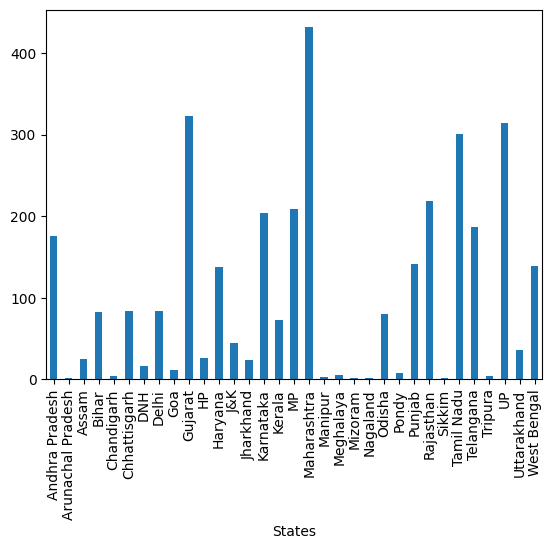

In [32]:
# @title Usage Distribution by State

df.groupby('States')['Usage'].mean().plot(kind='bar')

In [33]:
df.dropna(subset=['Dates'], inplace=True)


In [34]:
from dateutil import parser

def parse_date(date_str):
    formats = ["%d/%m/%Y %H:%M:%S", "%d-%m-%Y %H:%M"]
    for fmt in formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    # Fallback to dateutil parser for unhandled formats
    return parser.parse(date_str, dayfirst=True)  # Adjust `dayfirst` as needed

df['Dates'] = df['Dates'].apply(parse_date)


In [35]:
df['Dates'] = pd.to_datetime(df['Dates'], errors='coerce')


In [36]:
# Feature extraction
df['year'] = df['Dates'].dt.year
df['month'] = df['Dates'].dt.month
df['day'] = df['Dates'].dt.day
df['weekday'] = df['Dates'].dt.weekday
df['weekday_name'] = df['Dates'].dt.strftime('%A')
df['month_name'] = df['Dates'].dt.strftime('%B')

In [60]:
df.head()

,States,Regions,latitude,longitude,Dates,Usage,year,month,day,weekday,weekday_name,month_name
0,Punjab,NR,31.519974,75.980003,2019-01-02,119.9,2019,1,2,2,Wednesday,January
1,Haryana,NR,28.450006,77.019991,2019-01-02,130.3,2019,1,2,2,Wednesday,January
2,Rajasthan,NR,26.449999,74.639981,2019-01-02,234.1,2019,1,2,2,Wednesday,January
3,Delhi,NR,28.669993,77.230004,2019-01-02,85.8,2019,1,2,2,Wednesday,January
4,UP,NR,27.599981,78.050006,2019-01-02,313.9,2019,1,2,2,Wednesday,January


In [57]:
# Prepare data for Prophet
def prepare_data_for_prophet(state):
    state_df = df[df['States'] == state]
    
    df_prophet = state_df[['Dates', 'Usage']].rename(columns={'Dates': 'ds', 'Usage': 'y'})
    
    return df_prophet

state_models = {}

In [52]:
state_df

NameError: name 'state_df' is not defined

In [51]:
state

'Tripura'

In [50]:
df_prophet

,ds,y
32,2019-01-02,3.4
65,2019-01-03,3.6
98,2019-01-04,3.5
131,2019-01-05,3.5
164,2019-01-06,3.3
...,...,...
16466,2020-12-01,2.4
16499,2020-12-02,3.3
16532,2020-12-03,3.6
16565,2020-12-04,3.3


In [59]:
state_models

{'Punjab': <prophet.forecaster.Prophet at 0x1f46cd42250>,
 'Haryana': <prophet.forecaster.Prophet at 0x1f46d02e650>,
 'Rajasthan': <prophet.forecaster.Prophet at 0x1f46d0add90>,
 'Delhi': <prophet.forecaster.Prophet at 0x1f46cf2cd90>,
 'UP': <prophet.forecaster.Prophet at 0x1f46d113090>,
 'Uttarakhand': <prophet.forecaster.Prophet at 0x1f46cf2c990>,
 'HP': <prophet.forecaster.Prophet at 0x1f46cfde950>,
 'J&K': <prophet.forecaster.Prophet at 0x1f46cf24590>,
 'Chandigarh': <prophet.forecaster.Prophet at 0x1f46cf5eb10>,
 'Chhattisgarh': <prophet.forecaster.Prophet at 0x1f46cf24190>,
 'Gujarat': <prophet.forecaster.Prophet at 0x1f46d062550>,
 'MP': <prophet.forecaster.Prophet at 0x1f46c9fcd10>,
 'Maharashtra': <prophet.forecaster.Prophet at 0x1f46cf1bc50>,
 'Goa': <prophet.forecaster.Prophet at 0x1f46cd413d0>,
 'DNH': <prophet.forecaster.Prophet at 0x1f46ce606d0>,
 'Andhra Pradesh': <prophet.forecaster.Prophet at 0x1f46cf03e10>,
 'Telangana': <prophet.forecaster.Prophet at 0x1f46cf5e590>,


In [56]:
prepare_data_for_prophet('haryana')

Empty DataFrame
Columns: [States, Regions, latitude, longitude, Dates, Usage, year, month, day, weekday, weekday_name, month_name]
Index: []


,ds,y


In [61]:
for state in df['States'].unique():
    df_prophet = prepare_data_for_prophet(state)
    if not df_prophet.empty:
        train_size = int(len(df_prophet) * 0.8)
        train_df = df_prophet.iloc[:train_size]
        model = Prophet()
        print(train_df)
        model.fit(train_df)
        state_models[state] = model

       States Regions   latitude  longitude      Dates  Usage  year  month   
0      Punjab      NR  31.519974  75.980003 2019-01-02  119.9  2019      1  \
33     Punjab      NR  31.519974  75.980003 2019-01-03  121.9  2019      1   
66     Punjab      NR  31.519974  75.980003 2019-01-04  118.8  2019      1   
99     Punjab      NR  31.519974  75.980003 2019-01-05  121.0  2019      1   
132    Punjab      NR  31.519974  75.980003 2019-01-06  121.4  2019      1   
...       ...     ...        ...        ...        ...    ...   ...    ...   
16434  Punjab      NR  31.519974  75.980003 2020-12-01  130.8  2020     12   
16467  Punjab      NR  31.519974  75.980003 2020-12-02  129.4  2020     12   
16500  Punjab      NR  31.519974  75.980003 2020-12-03  132.1  2020     12   
16533  Punjab      NR  31.519974  75.980003 2020-12-04  132.1  2020     12   
16566  Punjab      NR  31.519974  75.980003 2020-12-05  120.4  2020     12   

       day  weekday weekday_name month_name  
0        2       

13:00:26 - cmdstanpy - INFO - Chain [1] start processing
13:00:26 - cmdstanpy - INFO - Chain [1] done processing
13:00:26 - cmdstanpy - INFO - Chain [1] start processing


        States Regions   latitude  longitude      Dates  Usage  year  month   
1      Haryana      NR  28.450006  77.019991 2019-01-02  130.3  2019      1  \
34     Haryana      NR  28.450006  77.019991 2019-01-03  133.5  2019      1   
67     Haryana      NR  28.450006  77.019991 2019-01-04  128.2  2019      1   
100    Haryana      NR  28.450006  77.019991 2019-01-05  127.5  2019      1   
133    Haryana      NR  28.450006  77.019991 2019-01-06  132.6  2019      1   
...        ...     ...        ...        ...        ...    ...   ...    ...   
16435  Haryana      NR  28.450006  77.019991 2020-12-01  126.0  2020     12   
16468  Haryana      NR  28.450006  77.019991 2020-12-02  127.3  2020     12   
16501  Haryana      NR  28.450006  77.019991 2020-12-03  129.7  2020     12   
16534  Haryana      NR  28.450006  77.019991 2020-12-04  128.4  2020     12   
16567  Haryana      NR  28.450006  77.019991 2020-12-05  111.2  2020     12   

       day  weekday weekday_name month_name  
1    

13:00:26 - cmdstanpy - INFO - Chain [1] done processing


          States Regions   latitude  longitude      Dates  Usage  year  month   
2      Rajasthan      NR  26.449999  74.639981 2019-01-02  234.1  2019      1  \
35     Rajasthan      NR  26.449999  74.639981 2019-01-03  240.2  2019      1   
68     Rajasthan      NR  26.449999  74.639981 2019-01-04  239.8  2019      1   
101    Rajasthan      NR  26.449999  74.639981 2019-01-05  239.1  2019      1   
134    Rajasthan      NR  26.449999  74.639981 2019-01-06  240.4  2019      1   
...          ...     ...        ...        ...        ...    ...   ...    ...   
16436  Rajasthan      NR  26.449999  74.639981 2020-12-01  220.4  2020     12   
16469  Rajasthan      NR  26.449999  74.639981 2020-12-02  218.4  2020     12   
16502  Rajasthan      NR  26.449999  74.639981 2020-12-03  205.6  2020     12   
16535  Rajasthan      NR  26.449999  74.639981 2020-12-04  207.0  2020     12   
16568  Rajasthan      NR  26.449999  74.639981 2020-12-05  201.4  2020     12   

       day  weekday weekday

13:00:26 - cmdstanpy - INFO - Chain [1] start processing


              ds      y
2     2019-01-02  234.1
35    2019-01-03  240.2
68    2019-01-04  239.8
101   2019-01-05  239.1
134   2019-01-06  240.4
...          ...    ...
13103 2020-02-22  233.9
13136 2020-02-23  223.1
13169 2020-02-24  230.6
13202 2020-02-25  239.3
13235 2020-02-26  242.0

[402 rows x 2 columns]


13:00:27 - cmdstanpy - INFO - Chain [1] done processing
13:00:27 - cmdstanpy - INFO - Chain [1] start processing


      States Regions   latitude  longitude      Dates  Usage  year  month   
3      Delhi      NR  28.669993  77.230004 2019-01-02   85.8  2019      1  \
36     Delhi      NR  28.669993  77.230004 2019-01-03   85.5  2019      1   
69     Delhi      NR  28.669993  77.230004 2019-01-04   83.5  2019      1   
102    Delhi      NR  28.669993  77.230004 2019-01-05   79.2  2019      1   
135    Delhi      NR  28.669993  77.230004 2019-01-06   76.6  2019      1   
...      ...     ...        ...        ...        ...    ...   ...    ...   
16437  Delhi      NR  28.669993  77.230004 2020-12-01   77.3  2020     12   
16470  Delhi      NR  28.669993  77.230004 2020-12-02   81.3  2020     12   
16503  Delhi      NR  28.669993  77.230004 2020-12-03   85.6  2020     12   
16536  Delhi      NR  28.669993  77.230004 2020-12-04   83.9  2020     12   
16569  Delhi      NR  28.669993  77.230004 2020-12-05   83.6  2020     12   

       day  weekday weekday_name month_name  
3        2        2    Wednes

13:00:27 - cmdstanpy - INFO - Chain [1] done processing
13:00:27 - cmdstanpy - INFO - Chain [1] start processing
13:00:27 - cmdstanpy - INFO - Chain [1] done processing


      States Regions   latitude  longitude      Dates  Usage  year  month   
4         UP      NR  27.599981  78.050006 2019-01-02  313.9  2019      1  \
37        UP      NR  27.599981  78.050006 2019-01-03  311.8  2019      1   
70        UP      NR  27.599981  78.050006 2019-01-04  320.7  2019      1   
103       UP      NR  27.599981  78.050006 2019-01-05  299.0  2019      1   
136       UP      NR  27.599981  78.050006 2019-01-06  286.8  2019      1   
...      ...     ...        ...        ...        ...    ...   ...    ...   
16438     UP      NR  27.599981  78.050006 2020-12-01  322.8  2020     12   
16471     UP      NR  27.599981  78.050006 2020-12-02  331.4  2020     12   
16504     UP      NR  27.599981  78.050006 2020-12-03  336.7  2020     12   
16537     UP      NR  27.599981  78.050006 2020-12-04  334.6  2020     12   
16570     UP      NR  27.599981  78.050006 2020-12-05  287.3  2020     12   

       day  weekday weekday_name month_name  
4        2        2    Wednes

13:00:27 - cmdstanpy - INFO - Chain [1] start processing
13:00:27 - cmdstanpy - INFO - Chain [1] done processing


              ds     y
5     2019-01-02  40.7
38    2019-01-03  39.3
71    2019-01-04  38.1
104   2019-01-05  39.2
137   2019-01-06  39.2
...          ...   ...
13106 2020-02-22  35.6
13139 2020-02-23  48.5
13172 2020-02-24  43.0
13205 2020-02-25  43.6
13238 2020-02-26  43.8

[402 rows x 2 columns]
      States Regions   latitude  longitude      Dates  Usage  year  month   
6         HP      NR  31.100025  77.166597 2019-01-02   30.0  2019      1  \
39        HP      NR  31.100025  77.166597 2019-01-03   30.1  2019      1   
72        HP      NR  31.100025  77.166597 2019-01-04   30.1  2019      1   
105       HP      NR  31.100025  77.166597 2019-01-05   30.2  2019      1   
138       HP      NR  31.100025  77.166597 2019-01-06   31.0  2019      1   
...      ...     ...        ...        ...        ...    ...   ...    ...   
16440     HP      NR  31.100025  77.166597 2020-12-01   25.4  2020     12   
16473     HP      NR  31.100025  77.166597 2020-12-02   25.8  2020     12   
16506  

13:00:28 - cmdstanpy - INFO - Chain [1] start processing
13:00:28 - cmdstanpy - INFO - Chain [1] done processing


              ds     y
6     2019-01-02  30.0
39    2019-01-03  30.1
72    2019-01-04  30.1
105   2019-01-05  30.2
138   2019-01-06  31.0
...          ...   ...
13107 2020-02-22  27.3
13140 2020-02-23  26.7
13173 2020-02-24  27.4
13206 2020-02-25  28.4
13239 2020-02-26  28.0

[402 rows x 2 columns]
      States Regions  latitude  longitude      Dates  Usage  year  month  day   
7        J&K      NR     33.45      76.24 2019-01-02   52.5  2019      1    2  \
40       J&K      NR     33.45      76.24 2019-01-03   54.1  2019      1    3   
73       J&K      NR     33.45      76.24 2019-01-04   53.2  2019      1    4   
106      J&K      NR     33.45      76.24 2019-01-05   51.5  2019      1    5   
139      J&K      NR     33.45      76.24 2019-01-06   53.2  2019      1    6   
...      ...     ...       ...        ...        ...    ...   ...    ...  ...   
16441    J&K      NR     33.45      76.24 2020-12-01   45.4  2020     12    1   
16474    J&K      NR     33.45      76.24 2020-12-02

13:00:28 - cmdstanpy - INFO - Chain [1] start processing
13:00:28 - cmdstanpy - INFO - Chain [1] done processing


              ds     y
7     2019-01-02  52.5
40    2019-01-03  54.1
73    2019-01-04  53.2
106   2019-01-05  51.5
139   2019-01-06  53.2
...          ...   ...
13108 2020-02-22  54.2
13141 2020-02-23  46.4
13174 2020-02-24  45.0
13207 2020-02-25  45.8
13240 2020-02-26  47.2

[402 rows x 2 columns]
           States Regions   latitude  longitude      Dates  Usage  year   
8      Chandigarh      NR  30.719997  76.780006 2019-01-02    5.0  2019  \
41     Chandigarh      NR  30.719997  76.780006 2019-01-03    4.9  2019   
74     Chandigarh      NR  30.719997  76.780006 2019-01-04    4.8  2019   
107    Chandigarh      NR  30.719997  76.780006 2019-01-05    4.3  2019   
140    Chandigarh      NR  30.719997  76.780006 2019-01-06    4.3  2019   
...           ...     ...        ...        ...        ...    ...   ...   
16442  Chandigarh      NR  30.719997  76.780006 2020-12-01    3.6  2020   
16475  Chandigarh      NR  30.719997  76.780006 2020-12-02    3.7  2020   
16508  Chandigarh      NR

13:00:28 - cmdstanpy - INFO - Chain [1] start processing
13:00:28 - cmdstanpy - INFO - Chain [1] done processing


              ds    y
8     2019-01-02  5.0
41    2019-01-03  4.9
74    2019-01-04  4.8
107   2019-01-05  4.3
140   2019-01-06  4.3
...          ...  ...
13109 2020-02-22  3.2
13142 2020-02-23  4.9
13175 2020-02-24  4.9
13208 2020-02-25  5.1
13241 2020-02-26  5.4

[402 rows x 2 columns]
             States Regions  latitude  longitude      Dates  Usage  year   
9      Chhattisgarh      WR  22.09042  82.159987 2019-01-02   78.7  2019  \
42     Chhattisgarh      WR  22.09042  82.159987 2019-01-03   78.8  2019   
75     Chhattisgarh      WR  22.09042  82.159987 2019-01-04   74.8  2019   
108    Chhattisgarh      WR  22.09042  82.159987 2019-01-05   69.0  2019   
141    Chhattisgarh      WR  22.09042  82.159987 2019-01-06   68.1  2019   
...             ...     ...       ...        ...        ...    ...   ...   
16443  Chhattisgarh      WR  22.09042  82.159987 2020-12-01  100.4  2020   
16476  Chhattisgarh      WR  22.09042  82.159987 2020-12-02  101.8  2020   
16509  Chhattisgarh      WR 

13:00:28 - cmdstanpy - INFO - Chain [1] start processing
13:00:28 - cmdstanpy - INFO - Chain [1] done processing


              ds     y
9     2019-01-02  78.7
42    2019-01-03  78.8
75    2019-01-04  74.8
108   2019-01-05  69.0
141   2019-01-06  68.1
...          ...   ...
13110 2020-02-22  81.8
13143 2020-02-23  96.3
13176 2020-02-24  95.4
13209 2020-02-25  95.2
13242 2020-02-26  97.0

[402 rows x 2 columns]
        States Regions  latitude  longitude      Dates  Usage  year  month   
10     Gujarat      WR   22.2587    71.1924 2019-01-02  319.5  2019      1  \
43     Gujarat      WR   22.2587    71.1924 2019-01-03  316.7  2019      1   
76     Gujarat      WR   22.2587    71.1924 2019-01-04  301.9  2019      1   
109    Gujarat      WR   22.2587    71.1924 2019-01-05  313.2  2019      1   
142    Gujarat      WR   22.2587    71.1924 2019-01-06  320.7  2019      1   
...        ...     ...       ...        ...        ...    ...   ...    ...   
16444  Gujarat      WR   22.2587    71.1924 2020-12-01  370.5  2020     12   
16477  Gujarat      WR   22.2587    71.1924 2020-12-02  377.4  2020     12  

13:00:29 - cmdstanpy - INFO - Chain [1] start processing
13:00:29 - cmdstanpy - INFO - Chain [1] done processing


              ds      y
10    2019-01-02  319.5
43    2019-01-03  316.7
76    2019-01-04  301.9
109   2019-01-05  313.2
142   2019-01-06  320.7
...          ...    ...
13111 2020-02-22  315.6
13144 2020-02-23  373.2
13177 2020-02-24  379.4
13210 2020-02-25  373.5
13243 2020-02-26  376.2

[402 rows x 2 columns]
      States Regions   latitude  longitude      Dates  Usage  year  month   
11        MP      WR  21.300391  76.130019 2019-01-02  253.0  2019      1  \
44        MP      WR  21.300391  76.130019 2019-01-03  253.6  2019      1   
77        MP      WR  21.300391  76.130019 2019-01-04  239.3  2019      1   
110       MP      WR  21.300391  76.130019 2019-01-05  228.2  2019      1   
143       MP      WR  21.300391  76.130019 2019-01-06  227.4  2019      1   
...      ...     ...        ...        ...        ...    ...   ...    ...   
16445     MP      WR  21.300391  76.130019 2020-12-01  208.1  2020     12   
16478     MP      WR  21.300391  76.130019 2020-12-02  209.8  2020     1

13:00:29 - cmdstanpy - INFO - Chain [1] start processing
13:00:29 - cmdstanpy - INFO - Chain [1] done processing


              ds      y
11    2019-01-02  253.0
44    2019-01-03  253.6
77    2019-01-04  239.3
110   2019-01-05  228.2
143   2019-01-06  227.4
...          ...    ...
13112 2020-02-22  253.7
13145 2020-02-23  208.7
13178 2020-02-24  209.7
13211 2020-02-25  210.6
13244 2020-02-26  213.5

[402 rows x 2 columns]
            States Regions   latitude  longitude      Dates  Usage  year   
12     Maharashtra      WR  19.250232  73.160175 2019-01-02  428.6  2019  \
45     Maharashtra      WR  19.250232  73.160175 2019-01-03  419.6  2019   
78     Maharashtra      WR  19.250232  73.160175 2019-01-04  395.8  2019   
111    Maharashtra      WR  19.250232  73.160175 2019-01-05  411.1  2019   
144    Maharashtra      WR  19.250232  73.160175 2019-01-06  408.6  2019   
...            ...     ...        ...        ...        ...    ...   ...   
16446  Maharashtra      WR  19.250232  73.160175 2020-12-01  494.1  2020   
16479  Maharashtra      WR  19.250232  73.160175 2020-12-02  492.8  2020   
1651

13:00:29 - cmdstanpy - INFO - Chain [1] start processing
13:00:29 - cmdstanpy - INFO - Chain [1] done processing


              ds      y
12    2019-01-02  428.6
45    2019-01-03  419.6
78    2019-01-04  395.8
111   2019-01-05  411.1
144   2019-01-06  408.6
...          ...    ...
13113 2020-02-22  401.3
13146 2020-02-23  497.2
13179 2020-02-24  504.1
13212 2020-02-25  501.8
13245 2020-02-26  496.2

[402 rows x 2 columns]
      States Regions   latitude  longitude      Dates  Usage  year  month   
13       Goa      WR  15.491997  73.818001 2019-01-02   12.8  2019      1  \
46       Goa      WR  15.491997  73.818001 2019-01-03   13.7  2019      1   
79       Goa      WR  15.491997  73.818001 2019-01-04   12.6  2019      1   
112      Goa      WR  15.491997  73.818001 2019-01-05   13.0  2019      1   
145      Goa      WR  15.491997  73.818001 2019-01-06   12.9  2019      1   
...      ...     ...        ...        ...        ...    ...   ...    ...   
16447    Goa      WR  15.491997  73.818001 2020-12-01   12.0  2020     12   
16480    Goa      WR  15.491997  73.818001 2020-12-02   12.0  2020     1

13:00:30 - cmdstanpy - INFO - Chain [1] start processing
13:00:30 - cmdstanpy - INFO - Chain [1] done processing


              ds     y
13    2019-01-02  12.8
46    2019-01-03  13.7
79    2019-01-04  12.6
112   2019-01-05  13.0
145   2019-01-06  12.9
...          ...   ...
13114 2020-02-22   9.5
13147 2020-02-23  10.7
13180 2020-02-24  10.7
13213 2020-02-25  10.7
13246 2020-02-26  10.7

[402 rows x 2 columns]
      States Regions   latitude  longitude      Dates  Usage  year  month   
14       DNH      WR  20.266578  73.016618 2019-01-02   18.6  2019      1  \
47       DNH      WR  20.266578  73.016618 2019-01-03   18.2  2019      1   
80       DNH      WR  20.266578  73.016618 2019-01-04   16.7  2019      1   
113      DNH      WR  20.266578  73.016618 2019-01-05   17.6  2019      1   
146      DNH      WR  20.266578  73.016618 2019-01-06   18.6  2019      1   
...      ...     ...        ...        ...        ...    ...   ...    ...   
16448    DNH      WR  20.266578  73.016618 2020-12-01   18.1  2020     12   
16481    DNH      WR  20.266578  73.016618 2020-12-02   18.2  2020     12   
16514  

13:00:30 - cmdstanpy - INFO - Chain [1] start processing
13:00:30 - cmdstanpy - INFO - Chain [1] done processing


              ds     y
14    2019-01-02  18.6
47    2019-01-03  18.2
80    2019-01-04  16.7
113   2019-01-05  17.6
146   2019-01-06  18.6
...          ...   ...
13115 2020-02-22  17.3
13148 2020-02-23  18.4
13181 2020-02-24  18.5
13214 2020-02-25  18.5
13247 2020-02-26  18.3

[402 rows x 2 columns]
               States Regions   latitude  longitude      Dates  Usage  year   
15     Andhra Pradesh      SR  14.750429  78.570026 2019-01-02  164.6  2019  \
48     Andhra Pradesh      SR  14.750429  78.570026 2019-01-03  170.1  2019   
81     Andhra Pradesh      SR  14.750429  78.570026 2019-01-04  165.2  2019   
114    Andhra Pradesh      SR  14.750429  78.570026 2019-01-05  167.4  2019   
147    Andhra Pradesh      SR  14.750429  78.570026 2019-01-06  171.2  2019   
...               ...     ...        ...        ...        ...    ...   ...   
16449  Andhra Pradesh      SR  14.750429  78.570026 2020-12-01  196.5  2020   
16482  Andhra Pradesh      SR  14.750429  78.570026 2020-12-02  197.

13:00:30 - cmdstanpy - INFO - Chain [1] start processing
13:00:30 - cmdstanpy - INFO - Chain [1] done processing


              ds      y
15    2019-01-02  164.6
48    2019-01-03  170.1
81    2019-01-04  165.2
114   2019-01-05  167.4
147   2019-01-06  171.2
...          ...    ...
13116 2020-02-22  161.7
13149 2020-02-23  196.6
13182 2020-02-24  196.5
13215 2020-02-25  195.6
13248 2020-02-26  201.7

[402 rows x 2 columns]
          States Regions  latitude  longitude      Dates  Usage  year  month   
16     Telangana      SR   18.1124    79.0193 2019-01-02  204.2  2019      1  \
49     Telangana      SR   18.1124    79.0193 2019-01-03  204.5  2019      1   
82     Telangana      SR   18.1124    79.0193 2019-01-04  201.2  2019      1   
115    Telangana      SR   18.1124    79.0193 2019-01-05  201.7  2019      1   
148    Telangana      SR   18.1124    79.0193 2019-01-06  194.9  2019      1   
...          ...     ...       ...        ...        ...    ...   ...    ...   
16450  Telangana      SR   18.1124    79.0193 2020-12-01  227.7  2020     12   
16483  Telangana      SR   18.1124    79.0193 20

13:00:31 - cmdstanpy - INFO - Chain [1] start processing
13:00:31 - cmdstanpy - INFO - Chain [1] done processing


              ds      y
16    2019-01-02  204.2
49    2019-01-03  204.5
82    2019-01-04  201.2
115   2019-01-05  201.7
148   2019-01-06  194.9
...          ...    ...
13117 2020-02-22  178.7
13150 2020-02-23  169.7
13183 2020-02-24  174.8
13216 2020-02-25  174.5
13249 2020-02-26  172.5

[402 rows x 2 columns]
          States Regions   latitude  longitude      Dates  Usage  year  month   
17     Karnataka      SR  12.570381  76.919997 2019-01-02  206.3  2019      1  \
50     Karnataka      SR  12.570381  76.919997 2019-01-03  212.2  2019      1   
83     Karnataka      SR  12.570381  76.919997 2019-01-04  205.3  2019      1   
116    Karnataka      SR  12.570381  76.919997 2019-01-05  212.4  2019      1   
149    Karnataka      SR  12.570381  76.919997 2019-01-06  217.5  2019      1   
...          ...     ...        ...        ...        ...    ...   ...    ...   
16451  Karnataka      SR  12.570381  76.919997 2020-12-01  248.6  2020     12   
16484  Karnataka      SR  12.570381  76.

13:00:31 - cmdstanpy - INFO - Chain [1] start processing
13:00:31 - cmdstanpy - INFO - Chain [1] done processing


              ds      y
17    2019-01-02  206.3
50    2019-01-03  212.2
83    2019-01-04  205.3
116   2019-01-05  212.4
149   2019-01-06  217.5
...          ...    ...
13118 2020-02-22  201.9
13151 2020-02-23  236.2
13184 2020-02-24  226.9
13217 2020-02-25  220.8
13250 2020-02-26  228.3

[402 rows x 2 columns]
       States Regions  latitude  longitude      Dates  Usage  year  month   
18     Kerala      SR  8.900373  76.569993 2019-01-02   72.7  2019      1  \
51     Kerala      SR  8.900373  76.569993 2019-01-03   73.6  2019      1   
84     Kerala      SR  8.900373  76.569993 2019-01-04   73.4  2019      1   
117    Kerala      SR  8.900373  76.569993 2019-01-05   75.4  2019      1   
150    Kerala      SR  8.900373  76.569993 2019-01-06   75.4  2019      1   
...       ...     ...       ...        ...        ...    ...   ...    ...   
16452  Kerala      SR  8.900373  76.569993 2020-12-01   86.4  2020     12   
16485  Kerala      SR  8.900373  76.569993 2020-12-02   84.7  2020     1

13:00:31 - cmdstanpy - INFO - Chain [1] start processing
13:00:31 - cmdstanpy - INFO - Chain [1] done processing


              ds     y
18    2019-01-02  72.7
51    2019-01-03  73.6
84    2019-01-04  73.4
117   2019-01-05  75.4
150   2019-01-06  75.4
...          ...   ...
13119 2020-02-22  60.3
13152 2020-02-23  84.4
13185 2020-02-24  86.1
13218 2020-02-25  84.0
13251 2020-02-26  83.1

[402 rows x 2 columns]
           States Regions   latitude  longitude      Dates  Usage  year   
19     Tamil Nadu      SR  12.920386  79.150042 2019-01-02  268.3  2019  \
52     Tamil Nadu      SR  12.920386  79.150042 2019-01-03  285.2  2019   
85     Tamil Nadu      SR  12.920386  79.150042 2019-01-04  270.3  2019   
118    Tamil Nadu      SR  12.920386  79.150042 2019-01-05  286.8  2019   
151    Tamil Nadu      SR  12.920386  79.150042 2019-01-06  298.3  2019   
...           ...     ...        ...        ...        ...    ...   ...   
16453  Tamil Nadu      SR  12.920386  79.150042 2020-12-01  357.3  2020   
16486  Tamil Nadu      SR  12.920386  79.150042 2020-12-02  356.9  2020   
16519  Tamil Nadu      SR

13:00:31 - cmdstanpy - INFO - Chain [1] start processing
13:00:31 - cmdstanpy - INFO - Chain [1] done processing


              ds      y
19    2019-01-02  268.3
52    2019-01-03  285.2
85    2019-01-04  270.3
118   2019-01-05  286.8
151   2019-01-06  298.3
...          ...    ...
13120 2020-02-22  275.1
13153 2020-02-23  349.6
13186 2020-02-24  343.7
13219 2020-02-25  330.9
13252 2020-02-26  332.9

[402 rows x 2 columns]
      States Regions   latitude  longitude      Dates  Usage  year  month   
20     Pondy      SR  11.934994      79.83 2019-01-02    6.3  2019      1  \
53     Pondy      SR  11.934994      79.83 2019-01-03    6.5  2019      1   
86     Pondy      SR  11.934994      79.83 2019-01-04    6.4  2019      1   
119    Pondy      SR  11.934994      79.83 2019-01-05    6.6  2019      1   
152    Pondy      SR  11.934994      79.83 2019-01-06    7.2  2019      1   
...      ...     ...        ...        ...        ...    ...   ...    ...   
16454  Pondy      SR  11.934994      79.83 2020-12-01    8.5  2020     12   
16487  Pondy      SR  11.934994      79.83 2020-12-02    8.5  2020     1

13:00:32 - cmdstanpy - INFO - Chain [1] start processing
13:00:32 - cmdstanpy - INFO - Chain [1] done processing


              ds    y
20    2019-01-02  6.3
53    2019-01-03  6.5
86    2019-01-04  6.4
119   2019-01-05  6.6
152   2019-01-06  7.2
...          ...  ...
13121 2020-02-22  7.3
13154 2020-02-23  8.9
13187 2020-02-24  8.7
13220 2020-02-25  8.4
13253 2020-02-26  8.1

[402 rows x 2 columns]
      States Regions   latitude  longitude      Dates  Usage  year  month   
21     Bihar      ER  25.785414  87.479973 2019-01-02   82.3  2019      1  \
54     Bihar      ER  25.785414  87.479973 2019-01-03   82.0  2019      1   
87     Bihar      ER  25.785414  87.479973 2019-01-04   82.9  2019      1   
120    Bihar      ER  25.785414  87.479973 2019-01-05   77.0  2019      1   
153    Bihar      ER  25.785414  87.479973 2019-01-06   76.4  2019      1   
...      ...     ...        ...        ...        ...    ...   ...    ...   
16455  Bihar      ER  25.785414  87.479973 2020-12-01   82.9  2020     12   
16488  Bihar      ER  25.785414  87.479973 2020-12-02   85.0  2020     12   
16521  Bihar      E

13:00:32 - cmdstanpy - INFO - Chain [1] start processing
13:00:32 - cmdstanpy - INFO - Chain [1] done processing


              ds      y
21    2019-01-02   82.3
54    2019-01-03   82.0
87    2019-01-04   82.9
120   2019-01-05   77.0
153   2019-01-06   76.4
...          ...    ...
13122 2020-02-22   75.7
13155 2020-02-23   88.1
13188 2020-02-24   92.8
13221 2020-02-25   98.6
13254 2020-02-26  100.3

[402 rows x 2 columns]
          States Regions   latitude  longitude      Dates  Usage  year  month   
22     Jharkhand      ER  23.800393  86.419986 2019-01-02   24.8  2019      1  \
55     Jharkhand      ER  23.800393  86.419986 2019-01-03   25.6  2019      1   
88     Jharkhand      ER  23.800393  86.419986 2019-01-04   26.3  2019      1   
121    Jharkhand      ER  23.800393  86.419986 2019-01-05   23.0  2019      1   
154    Jharkhand      ER  23.800393  86.419986 2019-01-06   22.6  2019      1   
...          ...     ...        ...        ...        ...    ...   ...    ...   
16456  Jharkhand      ER  23.800393  86.419986 2020-12-01   26.3  2020     12   
16489  Jharkhand      ER  23.800393  86.

13:00:32 - cmdstanpy - INFO - Chain [1] start processing
13:00:32 - cmdstanpy - INFO - Chain [1] done processing


              ds     y
22    2019-01-02  24.8
55    2019-01-03  25.6
88    2019-01-04  26.3
121   2019-01-05  23.0
154   2019-01-06  22.6
...          ...   ...
13123 2020-02-22  24.8
13156 2020-02-23  25.3
13189 2020-02-24  26.7
13222 2020-02-25  26.7
13255 2020-02-26  27.5

[402 rows x 2 columns]
       States Regions  latitude  longitude      Dates  Usage  year  month   
23     Odisha      ER  19.82043  85.900017 2019-01-02   70.2  2019      1  \
56     Odisha      ER  19.82043  85.900017 2019-01-03   67.9  2019      1   
89     Odisha      ER  19.82043  85.900017 2019-01-04   66.3  2019      1   
122    Odisha      ER  19.82043  85.900017 2019-01-05   65.8  2019      1   
155    Odisha      ER  19.82043  85.900017 2019-01-06   62.9  2019      1   
...       ...     ...       ...        ...        ...    ...   ...    ...   
16457  Odisha      ER  19.82043  85.900017 2020-12-01  105.7  2020     12   
16490  Odisha      ER  19.82043  85.900017 2020-12-02  112.3  2020     12   
16523  

13:00:32 - cmdstanpy - INFO - Chain [1] start processing
13:00:32 - cmdstanpy - INFO - Chain [1] done processing


              ds     y
23    2019-01-02  70.2
56    2019-01-03  67.9
89    2019-01-04  66.3
122   2019-01-05  65.8
155   2019-01-06  62.9
...          ...   ...
13124 2020-02-22  68.3
13157 2020-02-23  66.7
13190 2020-02-24  74.0
13223 2020-02-25  80.3
13256 2020-02-26  82.2

[402 rows x 2 columns]
            States Regions  latitude  longitude      Dates  Usage  year   
24     West Bengal      ER  22.58039  88.329947 2019-01-02  108.2  2019  \
57     West Bengal      ER  22.58039  88.329947 2019-01-03  110.2  2019   
90     West Bengal      ER  22.58039  88.329947 2019-01-04  106.8  2019   
123    West Bengal      ER  22.58039  88.329947 2019-01-05  107.0  2019   
156    West Bengal      ER  22.58039  88.329947 2019-01-06  106.4  2019   
...            ...     ...       ...        ...        ...    ...   ...   
16458  West Bengal      ER  22.58039  88.329947 2020-12-01  172.6  2020   
16491  West Bengal      ER  22.58039  88.329947 2020-12-02  174.4  2020   
16524  West Bengal      E

13:00:33 - cmdstanpy - INFO - Chain [1] start processing
13:00:33 - cmdstanpy - INFO - Chain [1] done processing


              ds      y
24    2019-01-02  108.2
57    2019-01-03  110.2
90    2019-01-04  106.8
123   2019-01-05  107.0
156   2019-01-06  106.4
...          ...    ...
13125 2020-02-22  104.1
13158 2020-02-23  164.0
13191 2020-02-24  183.5
13224 2020-02-25  194.5
13257 2020-02-26  194.6

[402 rows x 2 columns]
       States Regions  latitude  longitude      Dates  Usage  year  month   
25     Sikkim      ER  27.33333  88.616647 2019-01-02    2.0  2019      1  \
58     Sikkim      ER  27.33333  88.616647 2019-01-03    1.9  2019      1   
91     Sikkim      ER  27.33333  88.616647 2019-01-04    1.7  2019      1   
124    Sikkim      ER  27.33333  88.616647 2019-01-05    2.0  2019      1   
157    Sikkim      ER  27.33333  88.616647 2019-01-06    2.0  2019      1   
...       ...     ...       ...        ...        ...    ...   ...    ...   
16459  Sikkim      ER  27.33333  88.616647 2020-12-01    1.4  2020     12   
16492  Sikkim      ER  27.33333  88.616647 2020-12-02    1.5  2020     1

13:00:33 - cmdstanpy - INFO - Chain [1] start processing
13:00:33 - cmdstanpy - INFO - Chain [1] done processing


              ds    y
25    2019-01-02  2.0
58    2019-01-03  1.9
91    2019-01-04  1.7
124   2019-01-05  2.0
157   2019-01-06  2.0
...          ...  ...
13126 2020-02-22  1.4
13159 2020-02-23  1.2
13192 2020-02-24  1.1
13225 2020-02-25  1.1
13258 2020-02-26  1.4

[402 rows x 2 columns]
                  States Regions   latitude  longitude      Dates  Usage   
26     Arunachal Pradesh     NER  27.100399  93.616601 2019-01-02    2.1  \
59     Arunachal Pradesh     NER  27.100399  93.616601 2019-01-03    2.2   
92     Arunachal Pradesh     NER  27.100399  93.616601 2019-01-04    2.2   
125    Arunachal Pradesh     NER  27.100399  93.616601 2019-01-05    2.2   
158    Arunachal Pradesh     NER  27.100399  93.616601 2019-01-06    2.2   
...                  ...     ...        ...        ...        ...    ...   
16460  Arunachal Pradesh     NER  27.100399  93.616601 2020-12-01    2.1   
16493  Arunachal Pradesh     NER  27.100399  93.616601 2020-12-02    2.1   
16526  Arunachal Pradesh    

13:00:33 - cmdstanpy - INFO - Chain [1] start processing
13:00:33 - cmdstanpy - INFO - Chain [1] done processing


              ds    y
26    2019-01-02  2.1
59    2019-01-03  2.2
92    2019-01-04  2.2
125   2019-01-05  2.2
158   2019-01-06  2.2
...          ...  ...
13127 2020-02-22  2.2
13160 2020-02-23  1.9
13193 2020-02-24  1.9
13226 2020-02-25  2.1
13259 2020-02-26  2.2

[402 rows x 2 columns]
      States Regions   latitude  longitude      Dates  Usage  year  month   
27     Assam     NER  26.749981  94.216667 2019-01-02   21.7  2019      1  \
60     Assam     NER  26.749981  94.216667 2019-01-03   23.4  2019      1   
93     Assam     NER  26.749981  94.216667 2019-01-04   21.7  2019      1   
126    Assam     NER  26.749981  94.216667 2019-01-05   22.5  2019      1   
159    Assam     NER  26.749981  94.216667 2019-01-06   21.7  2019      1   
...      ...     ...        ...        ...        ...    ...   ...    ...   
16461  Assam     NER  26.749981  94.216667 2020-12-01   20.4  2020     12   
16494  Assam     NER  26.749981  94.216667 2020-12-02   23.3  2020     12   
16527  Assam     NE

13:00:33 - cmdstanpy - INFO - Chain [1] start processing
13:00:33 - cmdstanpy - INFO - Chain [1] done processing


              ds     y
27    2019-01-02  21.7
60    2019-01-03  23.4
93    2019-01-04  21.7
126   2019-01-05  22.5
159   2019-01-06  21.7
...          ...   ...
13128 2020-02-22  23.4
13161 2020-02-23  23.0
13194 2020-02-24  23.9
13227 2020-02-25  24.5
13260 2020-02-26  23.1

[402 rows x 2 columns]
        States Regions   latitude  longitude      Dates  Usage  year  month   
28     Manipur     NER  24.799971  93.950017 2019-01-02    2.7  2019      1  \
61     Manipur     NER  24.799971  93.950017 2019-01-03    2.4  2019      1   
94     Manipur     NER  24.799971  93.950017 2019-01-04    2.4  2019      1   
127    Manipur     NER  24.799971  93.950017 2019-01-05    2.7  2019      1   
160    Manipur     NER  24.799971  93.950017 2019-01-06    2.7  2019      1   
...        ...     ...        ...        ...        ...    ...   ...    ...   
16462  Manipur     NER  24.799971  93.950017 2020-12-01    2.1  2020     12   
16495  Manipur     NER  24.799971  93.950017 2020-12-02    2.4  2020

13:00:34 - cmdstanpy - INFO - Chain [1] start processing
13:00:34 - cmdstanpy - INFO - Chain [1] done processing


              ds    y
28    2019-01-02  2.7
61    2019-01-03  2.4
94    2019-01-04  2.4
127   2019-01-05  2.7
160   2019-01-06  2.7
...          ...  ...
13129 2020-02-22  2.7
13162 2020-02-23  2.3
13195 2020-02-24  2.4
13228 2020-02-25  2.6
13261 2020-02-26  2.6

[402 rows x 2 columns]
          States Regions   latitude  longitude      Dates  Usage  year  month   
29     Meghalaya     NER  25.570492  91.880014 2019-01-02    6.1  2019      1  \
62     Meghalaya     NER  25.570492  91.880014 2019-01-03    6.5  2019      1   
95     Meghalaya     NER  25.570492  91.880014 2019-01-04    6.3  2019      1   
128    Meghalaya     NER  25.570492  91.880014 2019-01-05    5.7  2019      1   
161    Meghalaya     NER  25.570492  91.880014 2019-01-06    6.2  2019      1   
...          ...     ...        ...        ...        ...    ...   ...    ...   
16463  Meghalaya     NER  25.570492  91.880014 2020-12-01    5.4  2020     12   
16496  Meghalaya     NER  25.570492  91.880014 2020-12-02    5.4

13:00:34 - cmdstanpy - INFO - Chain [1] start processing
13:00:34 - cmdstanpy - INFO - Chain [1] done processing


              ds    y
29    2019-01-02  6.1
62    2019-01-03  6.5
95    2019-01-04  6.3
128   2019-01-05  5.7
161   2019-01-06  6.2
...          ...  ...
13130 2020-02-22  6.3
13163 2020-02-23  5.6
13196 2020-02-24  5.0
13229 2020-02-25  5.3
13262 2020-02-26  5.5

[402 rows x 2 columns]
        States Regions   latitude  longitude      Dates  Usage  year  month   
30     Mizoram     NER  23.710399  92.720015 2019-01-02    1.9  2019      1  \
63     Mizoram     NER  23.710399  92.720015 2019-01-03    1.8  2019      1   
96     Mizoram     NER  23.710399  92.720015 2019-01-04    1.7  2019      1   
129    Mizoram     NER  23.710399  92.720015 2019-01-05    1.8  2019      1   
162    Mizoram     NER  23.710399  92.720015 2019-01-06    1.9  2019      1   
...        ...     ...        ...        ...        ...    ...   ...    ...   
16464  Mizoram     NER  23.710399  92.720015 2020-12-01    1.8  2020     12   
16497  Mizoram     NER  23.710399  92.720015 2020-12-02    1.6  2020     12   
1

13:00:34 - cmdstanpy - INFO - Chain [1] start processing
13:00:34 - cmdstanpy - INFO - Chain [1] done processing


              ds    y
30    2019-01-02  1.9
63    2019-01-03  1.8
96    2019-01-04  1.7
129   2019-01-05  1.8
162   2019-01-06  1.9
...          ...  ...
13131 2020-02-22  1.9
13164 2020-02-23  1.7
13197 2020-02-24  1.8
13230 2020-02-25  1.6
13263 2020-02-26  1.6

[402 rows x 2 columns]
         States Regions   latitude  longitude      Dates  Usage  year  month   
31     Nagaland     NER  25.666998   94.11657 2019-01-02    2.2  2019      1  \
64     Nagaland     NER  25.666998   94.11657 2019-01-03    2.2  2019      1   
97     Nagaland     NER  25.666998   94.11657 2019-01-04    2.2  2019      1   
130    Nagaland     NER  25.666998   94.11657 2019-01-05    2.3  2019      1   
163    Nagaland     NER  25.666998   94.11657 2019-01-06    2.3  2019      1   
...         ...     ...        ...        ...        ...    ...   ...    ...   
16465  Nagaland     NER  25.666998   94.11657 2020-12-01    2.0  2020     12   
16498  Nagaland     NER  25.666998   94.11657 2020-12-02    2.1  2020   

13:00:35 - cmdstanpy - INFO - Chain [1] start processing
13:00:35 - cmdstanpy - INFO - Chain [1] done processing


              ds    y
31    2019-01-02  2.2
64    2019-01-03  2.2
97    2019-01-04  2.2
130   2019-01-05  2.3
163   2019-01-06  2.3
...          ...  ...
13132 2020-02-22  2.1
13165 2020-02-23  2.0
13198 2020-02-24  2.0
13231 2020-02-25  2.3
13264 2020-02-26  2.3

[402 rows x 2 columns]
        States Regions   latitude  longitude      Dates  Usage  year  month   
32     Tripura     NER  23.835404  91.279999 2019-01-02    3.4  2019      1  \
65     Tripura     NER  23.835404  91.279999 2019-01-03    3.6  2019      1   
98     Tripura     NER  23.835404  91.279999 2019-01-04    3.5  2019      1   
131    Tripura     NER  23.835404  91.279999 2019-01-05    3.5  2019      1   
164    Tripura     NER  23.835404  91.279999 2019-01-06    3.3  2019      1   
...        ...     ...        ...        ...        ...    ...   ...    ...   
16466  Tripura     NER  23.835404  91.279999 2020-12-01    2.4  2020     12   
16499  Tripura     NER  23.835404  91.279999 2020-12-02    3.3  2020     12   
1

13:00:35 - cmdstanpy - INFO - Chain [1] start processing
13:00:35 - cmdstanpy - INFO - Chain [1] done processing


              ds    y
32    2019-01-02  3.4
65    2019-01-03  3.6
98    2019-01-04  3.5
131   2019-01-05  3.5
164   2019-01-06  3.3
...          ...  ...
13133 2020-02-22  3.8
13166 2020-02-23  4.6
13199 2020-02-24  4.9
13232 2020-02-25  4.5
13265 2020-02-26  4.9

[402 rows x 2 columns]


In [39]:
df.columns


Index(['States', 'Regions', 'latitude', 'longitude', 'Dates', 'Usage', 'year',
       'month', 'day', 'weekday', 'weekday_name', 'month_name'],
      dtype='object')

In [49]:
train_df.head()

,ds,y
32,2019-01-02,3.4
65,2019-01-03,3.6
98,2019-01-04,3.5
131,2019-01-05,3.5
164,2019-01-06,3.3


In [47]:
train_df.head()

forecast=model.predict(train_df)

In [48]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-02,4.139929,3.286123,5.159544,4.139929,4.139929,0.055358,0.055358,0.055358,0.055358,0.055358,0.055358,0.0,0.0,0.0,4.195287
1,2019-01-03,4.139864,3.193442,5.129732,4.139864,4.139864,-0.012319,-0.012319,-0.012319,-0.012319,-0.012319,-0.012319,0.0,0.0,0.0,4.127545
2,2019-01-04,4.139799,3.208396,5.021288,4.139799,4.139799,-0.032055,-0.032055,-0.032055,-0.032055,-0.032055,-0.032055,0.0,0.0,0.0,4.107744
3,2019-01-05,4.139734,3.195592,5.051342,4.139734,4.139734,0.007896,0.007896,0.007896,0.007896,0.007896,0.007896,0.0,0.0,0.0,4.147630
4,2019-01-06,4.139669,3.277794,5.043868,4.139669,4.139669,0.025761,0.025761,0.025761,0.025761,0.025761,0.025761,0.0,0.0,0.0,4.165430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,2020-02-22,4.112742,3.131083,5.086655,4.112742,4.112742,0.007896,0.007896,0.007896,0.007896,0.007896,0.007896,0.0,0.0,0.0,4.120638
398,2020-02-23,4.112676,3.142262,5.063694,4.112676,4.112676,0.025761,0.025761,0.025761,0.025761,0.025761,0.025761,0.0,0.0,0.0,4.138437
399,2020-02-24,4.112610,3.232655,5.088275,4.112610,4.112610,-0.015679,-0.015679,-0.015679,-0.015679,-0.015679,-0.015679,0.0,0.0,0.0,4.096931
400,2020-02-25,4.112545,3.179817,4.989399,4.112545,4.112545,-0.028961,-0.028961,-0.028961,-0.028961,-0.028961,-0.028961,0.0,0.0,0.0,4.083584


In [40]:
df.head()

,States,Regions,latitude,longitude,Dates,Usage,year,month,day,weekday,weekday_name,month_name
0,Punjab,NR,31.519974,75.980003,2019-01-02,119.9,2019,1,2,2,Wednesday,January
1,Haryana,NR,28.450006,77.019991,2019-01-02,130.3,2019,1,2,2,Wednesday,January
2,Rajasthan,NR,26.449999,74.639981,2019-01-02,234.1,2019,1,2,2,Wednesday,January
3,Delhi,NR,28.669993,77.230004,2019-01-02,85.8,2019,1,2,2,Wednesday,January
4,UP,NR,27.599981,78.050006,2019-01-02,313.9,2019,1,2,2,Wednesday,January


In [41]:
# Prediction function
def predict_energy(state, start_date, end_date):
    model = state_models.get(state)
    if not model:
        return f"No model found for state: {state}", None, None, None

    date_range = pd.date_range(start=start_date, end=end_date)
    if date_range.empty:
        return "No data available for the specified date range.", None, None, None

    future = pd.DataFrame({'ds': date_range})
    forecast = model.predict(future)
    print(forecast)
    # Add actual data for validation if available
    test_df = future.merge(df[df['States'] == state][['Dates', 'Usage']], how='left', left_on='ds', right_on='Dates')
    actual_data = test_df['Usage'].dropna()
    forecast_data = forecast['yhat'][:len(actual_data)]

    if actual_data.empty:
        mse_value = "N/A (No actual data)"
        performance = "N/A"
    else:
        mse_value = mean_squared_error(actual_data, forecast_data)
        if mse_value > 100000:
            performance = "Poor"
        elif mse_value > 50000:
            performance = "Average"
        else:
            performance = "Best"

    result = pd.DataFrame({'Date': date_range, 'Predicted Usage': forecast['yhat']})

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=date_range, y=forecast['yhat'], mode='lines', name='Predicted'))
    fig.update_layout(
        title='Energy Consumption Forecast',
        xaxis_title='Date',
        yaxis_title='Energy Consumption (kWh)',
        hovermode='x unified',
        updatemenus=[
            dict(
                buttons=list([
                    dict(
                        args=["type", "scatter"],
                        label="Scatter Plot",
                        method="restyle"
                    ),
                    dict(
                        args=["type", "bar"],
                        label="Bar Plot",
                        method="restyle"
                    )
                ]),
                direction="down",
                pad={"r": 10, "t": 10},
                showactive=True,
                x=0.17,
                xanchor="left",
                y=1.15,
                yanchor="top"
            ),
        ]
    )

    return result.to_string(index=False), f"MSE: {mse_value}", performance, fig


In [42]:
# # Gradio Interface
# def on_click(state_input, start_date_input, end_date_input):
#     result, mse_value, performance, fig = predict_energy(state_input, start_date_input, end_date_input)
#     return result, mse_value, performance, fig

# # Introduction text
# intro_text = """
# <h1 style="text-align: center;">Energy Consumption Forecasting System</h1>

# This system allows you to predict energy consumption for different states based on historical data. You can select a state, and provide a start date and end date to get predictions for the specified date range.

# ---

# **Instructions:**

# 1. **Select the state** for which you want to forecast energy consumption.
# 2. **Enter the start date and end date** in `YYYY-MM-DD` format.
# 3. **Click the submit button** to get the predicted energy consumption, Mean Squared Error (MSE), and model performance.

# ---

# The results will include a graph showing the predicted energy consumption over the specified date range.
# """

# demo = gr.Blocks()

# with demo:
#     gr.Markdown(intro_text)
#     with gr.Row():
#         state_input = gr.Dropdown(choices=df['States'].unique().tolist(), label="State")
#         start_date_input = gr.Da(placeholder="YYYY-MM-DD", label="Start Date")
#         end_date_input = gr.Textbox(placeholder="YYYY-MM-DD", label="End Date")
#     submit_button = gr.Button("Submit")
#     result_output = gr.Textbox(label="Predicted Energy Consumption")
#     mse_output = gr.Textbox(label="Mean Squared Error")
#     performance_output = gr.Textbox(label="Model Performance")
#     graph_output = gr.Plot(label="Predicted Energy Consumption Graph")

#     gr.Markdown("""
#     <p style="text-align: center;">Team 4: Bhavya, Aditya, Pranam, Triveni </p>
#     """)

#     submit_button.click(on_click, [state_input, start_date_input, end_date_input], [result_output, mse_output, performance_output, graph_output])

# demo.launch(share=True)

In [20]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import pickle
with open('prophet_model.pkl', 'wb') as f:
    pickle.dump(model, f)